In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('churn_modeling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploratory data analysis and visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

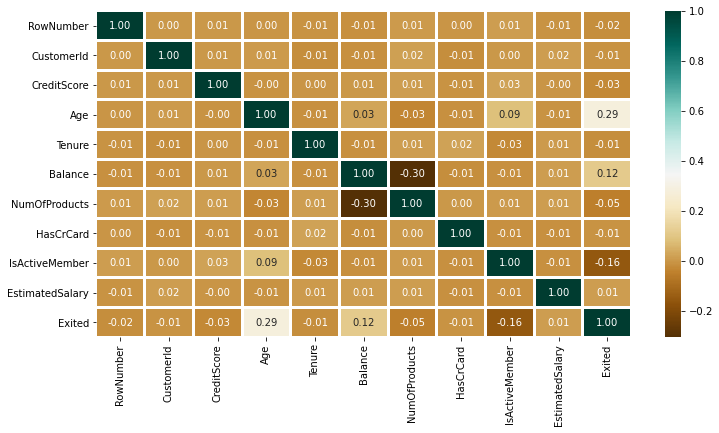

In [15]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

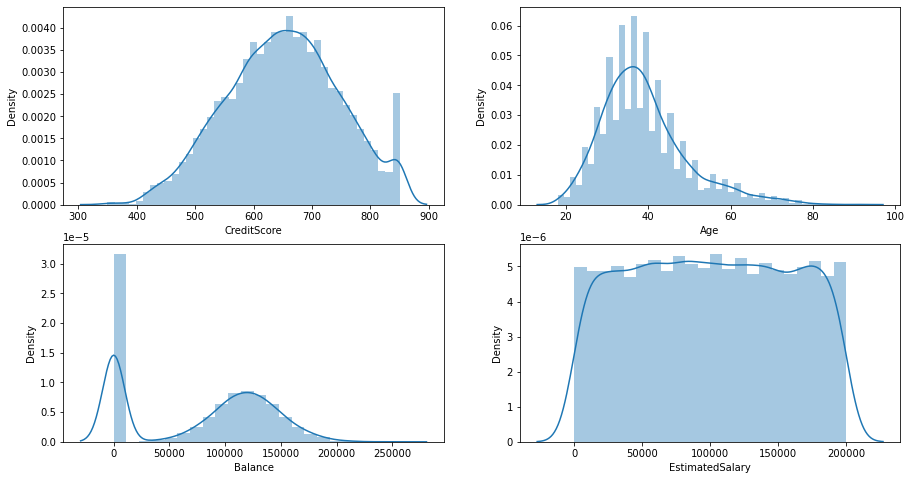

In [21]:
lis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
plt.subplots(figsize=(15, 8)) 
index = 1

for i in lis: 
	plt.subplot(2, 2, index) 
	sns.distplot(df[i]) 
	index += 1


### We can also check the categorical count of each category in Geography and Gender.

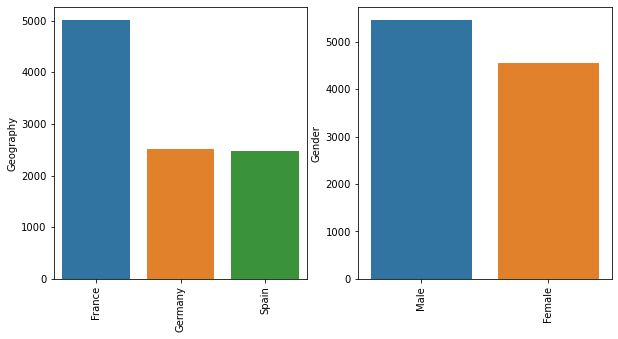

In [22]:
lis2 = ['Geography', 'Gender'] 
plt.subplots(figsize=(10, 5)) 
index = 1

for col in lis2: 
	y = df[col].value_counts() 
	plt.subplot(1, 2, index) 
	plt.xticks(rotation=90) 
	sns.barplot(x=list(y.index), y=y) 
	index += 1


### Finding Missing Values and Handling them

In [24]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Label Encoding

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
le = LabelEncoder()

In [29]:
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### Splitting Dependent and Independent Variables

In [33]:
x = df.iloc[:,3:13].values
y = df.iloc[:,13:14].values

### Splitting into Train and Test Dataset

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

### Feature Scaling

In [36]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

### Model Training and Evaluation

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [46]:
knn = KNeighborsClassifier(n_neighbors =3)
rfc = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
svc = SVC()
lc  = LogisticRegression()

In [47]:
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test) 
    print("Accuracy score of ",clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(y_test, y_pred))

<ipython-input-47-235d037e49c2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  RandomForestClassifier = 84.2
Accuracy score of  KNeighborsClassifier = 82.72


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy score of  SVC = 86.08
Accuracy score of  LogisticRegression = 80.47999999999999


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Train models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machines": SVC(),
    "Logistic Regression": LogisticRegression()
}

trained_models = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    

###  Problem 1 : Save and Load Machine Learning Models in Python with scikit-learn

In [6]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import joblib 
  
# import the dataset 
dataset = pd.read_csv('headbrain.csv') 
  
X = dataset.iloc[:, : -1].values 
Y = dataset.iloc[:, -1].values 

In [7]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size=0.2, random_state=0) 
  
# create a linear regression model 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
  
  
# save the model 
filename = 'linear_model_2.sav'
joblib.dump(regressor, open(filename, 'wb')) 
  
# load the model 
load_model = joblib.load(open(filename, 'rb')) 
  
y_pred = load_model.predict(X_test) 
print('root mean squared error : ', np.sqrt( 
    metrics.mean_squared_error(y_test, y_pred))) 

root mean squared error :  71.23878018173238


In [9]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import pickle 
  
# import the dataset 
dataset = pd.read_csv('headbrain.csv') 
  
X = dataset.iloc[:, : -1].values 
Y = dataset.iloc[:, -1].values 
  
# train test split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size=0.2, random_state=0) 
  
# create a linear regression model 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
  
  
# save the model 
filename = 'linear_model.sav'
pickle.dump(regressor, open(filename, 'wb')) 
  
# load the model 
load_model = pickle.load(open(filename, 'rb')) 
  
y_pred = load_model.predict(X_test) 
print('root mean squared error : ', np.sqrt( 
    metrics.mean_squared_error(y_test, y_pred))) 

root mean squared error :  71.23878018173238
